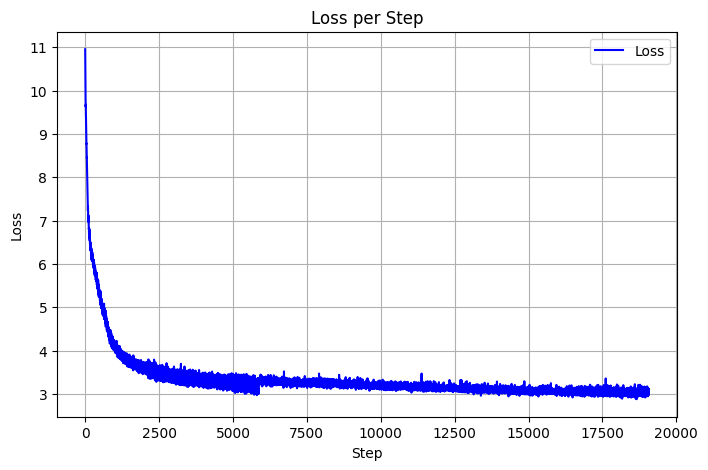

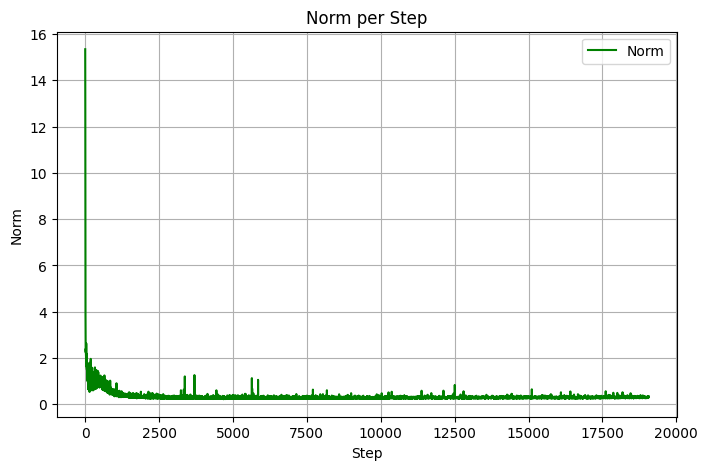

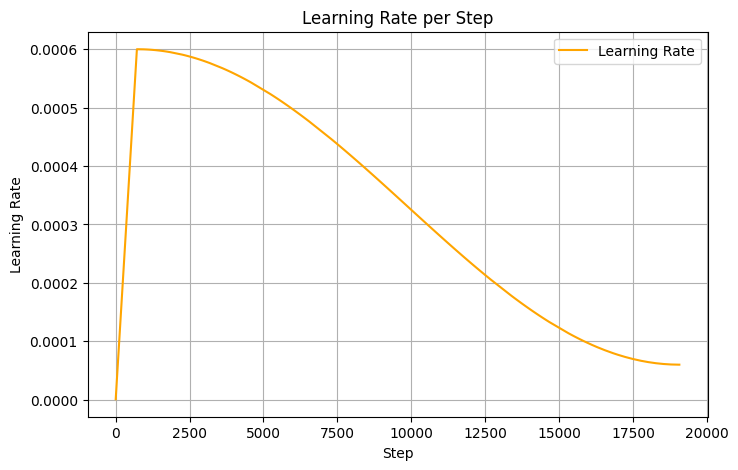

In [34]:
import re
import matplotlib.pyplot as plt

def parse_log(filepath):
    steps, losses, lrs, norms = [], [], [], []
    with open(filepath, 'r') as file:
        for line in file:
            if line.startswith('step'):
                step_match = re.search(r'step\s+(\d+)', line)
                loss_match = re.search(r'loss:\s+([\d.]+)', line)
                lr_match = re.search(r'lr\s+([\d.e-]+)', line)
                norm_match = re.search(r'norm:\s+([\d.]+)', line)

                if step_match and loss_match and lr_match and norm_match:
                    steps.append(int(step_match.group(1)))
                    losses.append(float(loss_match.group(1)))
                    lrs.append(float(lr_match.group(1)))
                    norms.append(float(norm_match.group(1)))

    return steps, losses, lrs, norms

def plot_stats(steps, values, label, ylabel, title, color):
    plt.figure(figsize=(8, 5))
    plt.plot(steps, values, label=label, color=color)
    plt.xlabel('Step')
    plt.ylabel(ylabel)
    plt.title(title)
    plt.grid(True)
    plt.legend()
    plt.show()

log_file = 'out/train-2x-h100-overnight.log'
steps, losses, lrs, norms = parse_log(log_file)

if steps:
    plot_stats(steps, losses, 'Loss', 'Loss', 'Loss per Step', 'blue')
    plot_stats(steps, norms, 'Norm', 'Norm', 'Norm per Step', 'green')
    plot_stats(steps, lrs, 'Learning Rate', 'Learning Rate', 'Learning Rate per Step', 'orange')
else:
    print("No data")
